In [2]:
from src.IOSystem import IOSystem
from src.SupplyChain import SupplyChain

In [3]:
iosystem = IOSystem(year=2022, language="Deutsch").load()

INFO - Fast database for year 2022 likely exists due to the presence of an L matrix - loading...
INFO - Database has been loaded successfully in 5.876 seconds


In [4]:
sc = SupplyChain(iosystem=iosystem, Kontinent = "Europa", Wirtschaftssektor = "Sekundär")

In [5]:
sc.plot_worldmap_by_impact(impact="Treibhausgasemissionen", show_legend=True, mode="continuous", return_data=True)

(<Figure size 1500x1000 with 2 Axes>,
                                              geometry  \
 AT  POLYGON ((16.97967 48.1235, 16.90375 47.71487,...   
 BE  POLYGON ((6.15666 50.80372, 6.04307 50.12805, ...   
 BG  POLYGON ((22.65715 44.23492, 22.94483 43.82379...   
 CY  POLYGON ((34.00488 34.9781, 32.97983 34.57187,...   
 CZ  POLYGON ((15.017 51.10667, 15.49097 50.78473, ...   
 DE  POLYGON ((14.11969 53.75703, 14.35332 53.24817...   
 DK  MULTIPOLYGON (((12.69001 55.60999, 12.08999 54...   
 EE  POLYGON ((27.98113 59.47537, 27.98112 59.47537...   
 ES  POLYGON ((-7.45373 37.09779, -7.53711 37.4289,...   
 FI  POLYGON ((28.59193 69.06478, 28.44594 68.36461...   
 FR  MULTIPOLYGON (((-52.24934 3.24109, -52.55642 2...   
 GR  MULTIPOLYGON (((26.165 35.005, 24.72498 34.919...   
 HR  POLYGON ((16.56481 46.50375, 16.88252 46.38063...   
 HU  POLYGON ((22.08561 48.42226, 22.64082 48.15024...   
 IE  POLYGON ((-6.19788 53.86757, -6.03299 53.15316...   
 IT  MULTIPOLYGON (((15.52038 38.2

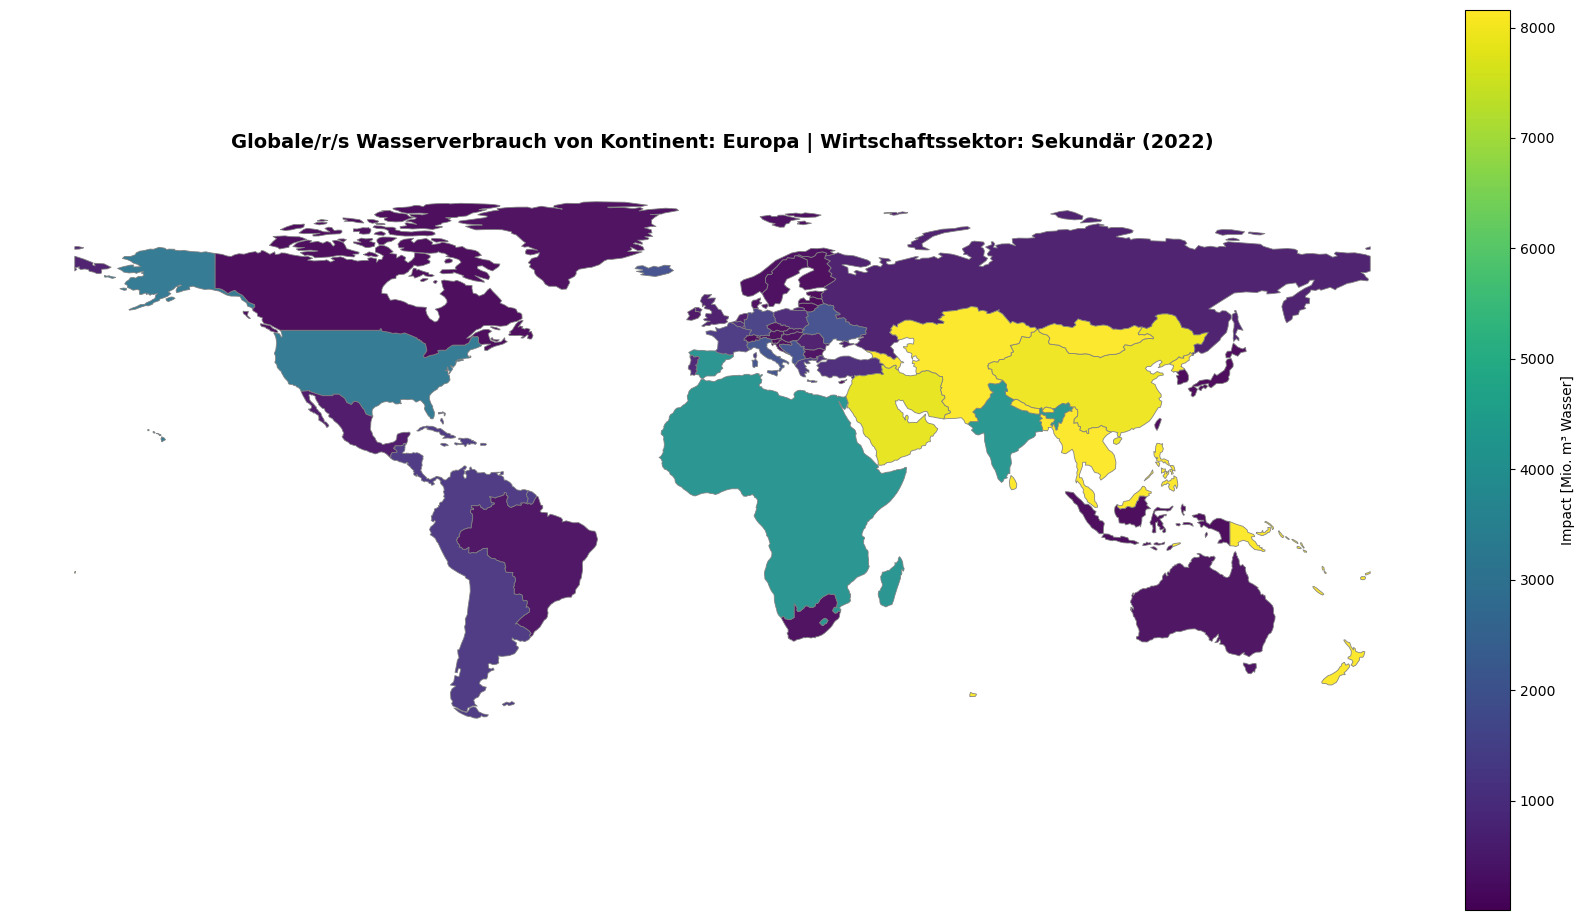

In [5]:
sc.plot_worldmap_by_impact(
    impact="Wasserverbrauch",
    color="viridis",
    show_legend=True,
    relative=True,          
    mode="continuous",
    norm_mode="linear",
    robust=2.0
)

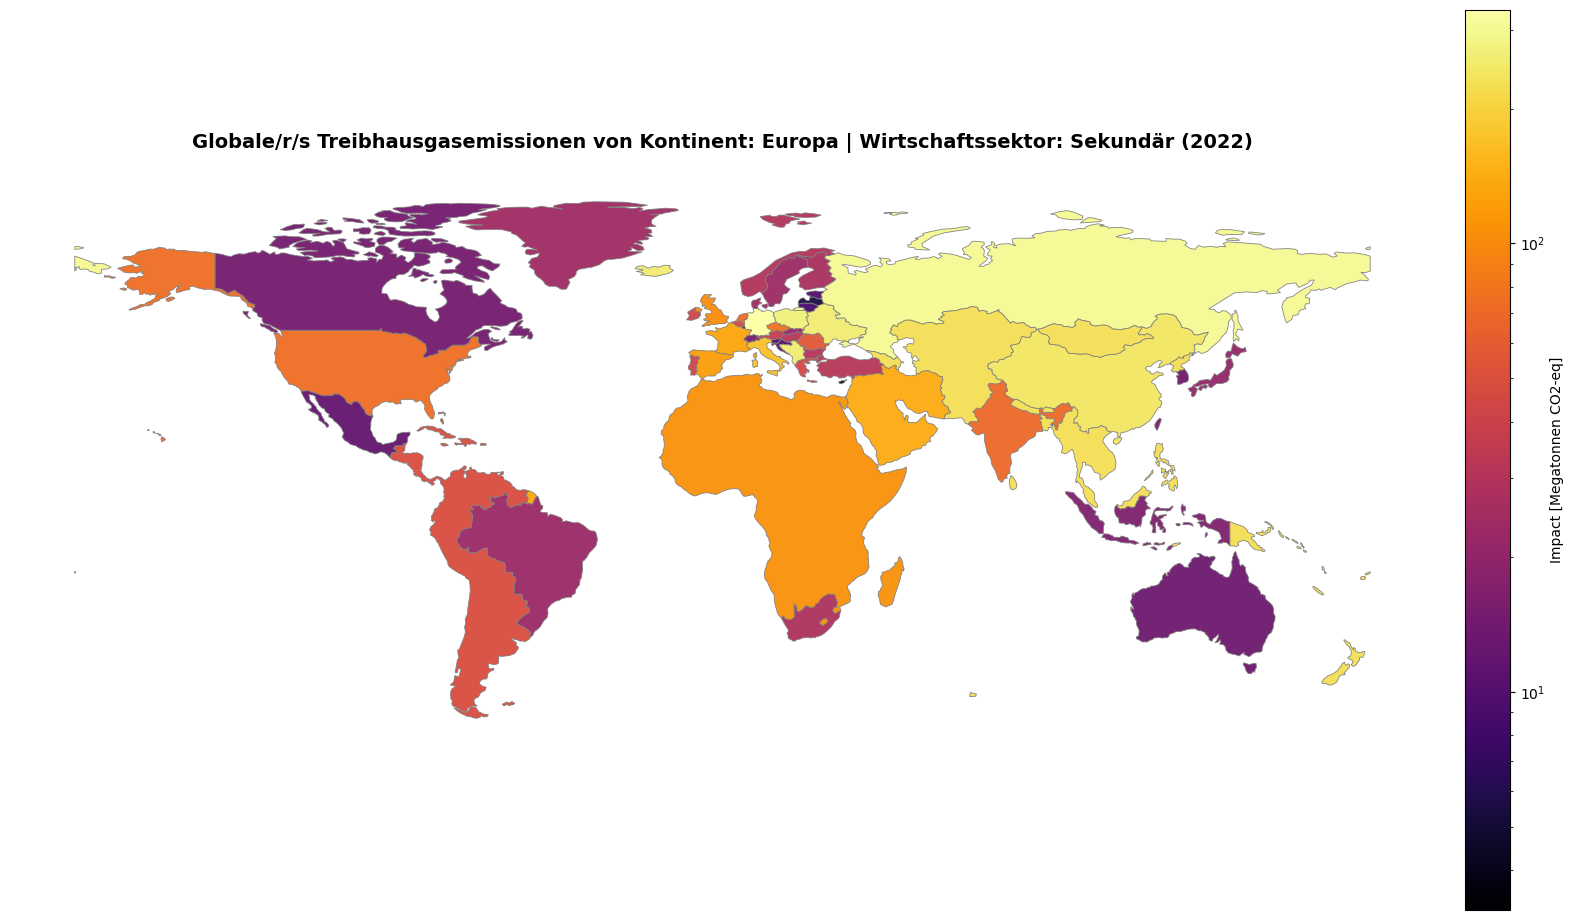

In [6]:
sc.plot_worldmap_by_impact(
    impact="Treibhausgasemissionen",
    color="inferno",
    show_legend=True,
    mode="continuous",
    norm_mode="log",
    robust=1.0
)

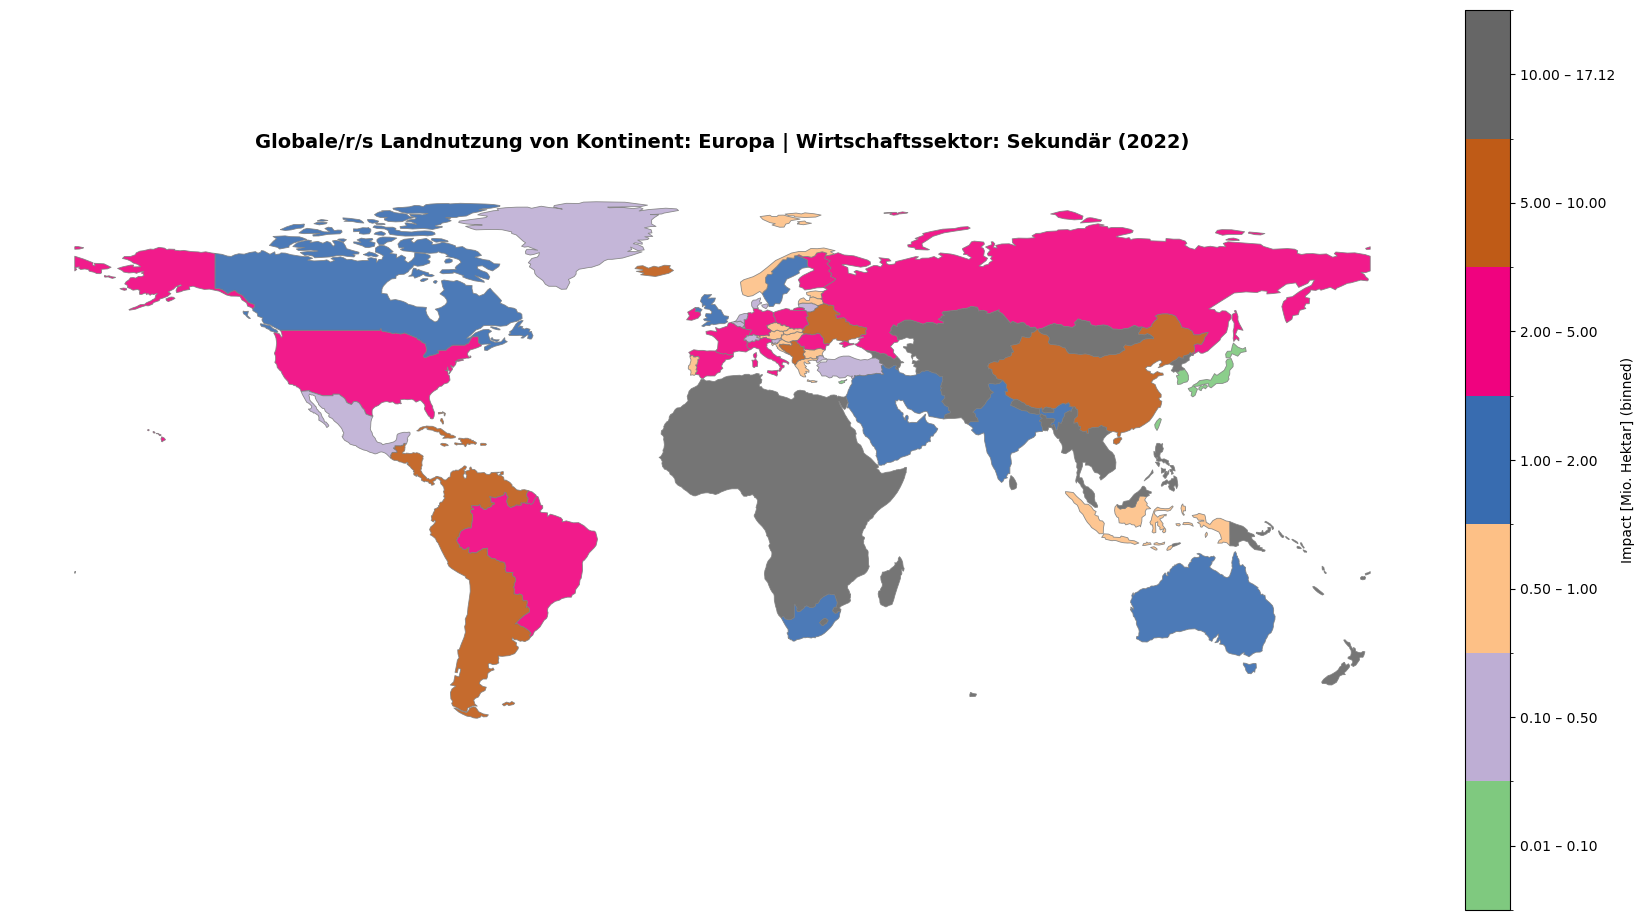

In [8]:
sc.plot_worldmap_by_impact(
    impact="Landnutzung",
    color="Accent",
    show_legend=True,
    relative=True,
    mode="binned",
    custom_bins=[0.1, 0.5, 1, 2, 5, 10]
)